# Práctica 1
## Gabriel Daniel Aguilar Luna
### _Facultad de Ingeniería, Universidad Nacional Autónoma de México_
### _Ciudad de México, México_
#### gabriel.aguilar@ingenieria.unam.edu
***
## Objetivo:
Preprocesar un corpus a partir de métodos basados en lenguajes formales.
***

## Desarollo:

### 1. Escoger un corpus de cualquier idioma y de un tamaño mayor a 10 000 tokens (se puede tomar este corpus de la paquetería nltk.corpus). Este corpus se usará a lo largo del curso.

In [1]:
#Bibliotecas
from nltk.corpus import words
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from random import sample, choice

In [2]:
#En el arreglo corpus se guardan las palabras
#del corpus words de nltk todo en lowercase
corpus = [w.lower() for w in words.words()]
tokens = len(corpus)
tipos = len(set(corpus))

In [3]:
print("Tokens:\t",tokens)
print("Tipos:\t",tipos, end="\n\n")
print(sample(corpus,80))

Tokens:	 236736
Tipos:	 234377

['desophisticate', 'verascope', 'unflouted', 'incommodiousness', 'distannic', 'uncontroverted', 'pandora', 'perichoresis', 'patellula', 'sclerodermi', 'cotunnite', 'defyingly', 'microliter', 'coital', 'mantispid', 'ambigenous', 'resignationism', 'probudget', 'sinisterly', 'transmissible', 'transcondylar', 'ateloglossia', 'erythroxylaceous', 'platyrrhinian', 'waffle', 'yeraver', 'clear', 'myrosin', 'kava', 'eaglewood', 'gimcrack', 'unpresbyterated', 'dare', 'trochleariform', 'versify', 'synchronousness', 'aminoglutaric', 'doeskin', 'universalism', 'bookless', 'mohegan', 'perpetratress', 'binnite', 'almain', 'alkargen', 'kerasin', 'unprobationary', 'rumex', 'sparkish', 'unvoyageable', 'maculopapular', 'crateman', 'sunup', 'marcionist', 'underyield', 'creatine', 'pericranitis', 'superdural', 'ropemaker', 'fucales', 'extrarenal', 'superimposed', 'vaginule', 'antiempirical', 'aphroditeum', 'presolar', 'pericowperitis', 'peevishly', 'venomousness', 'lamenting'

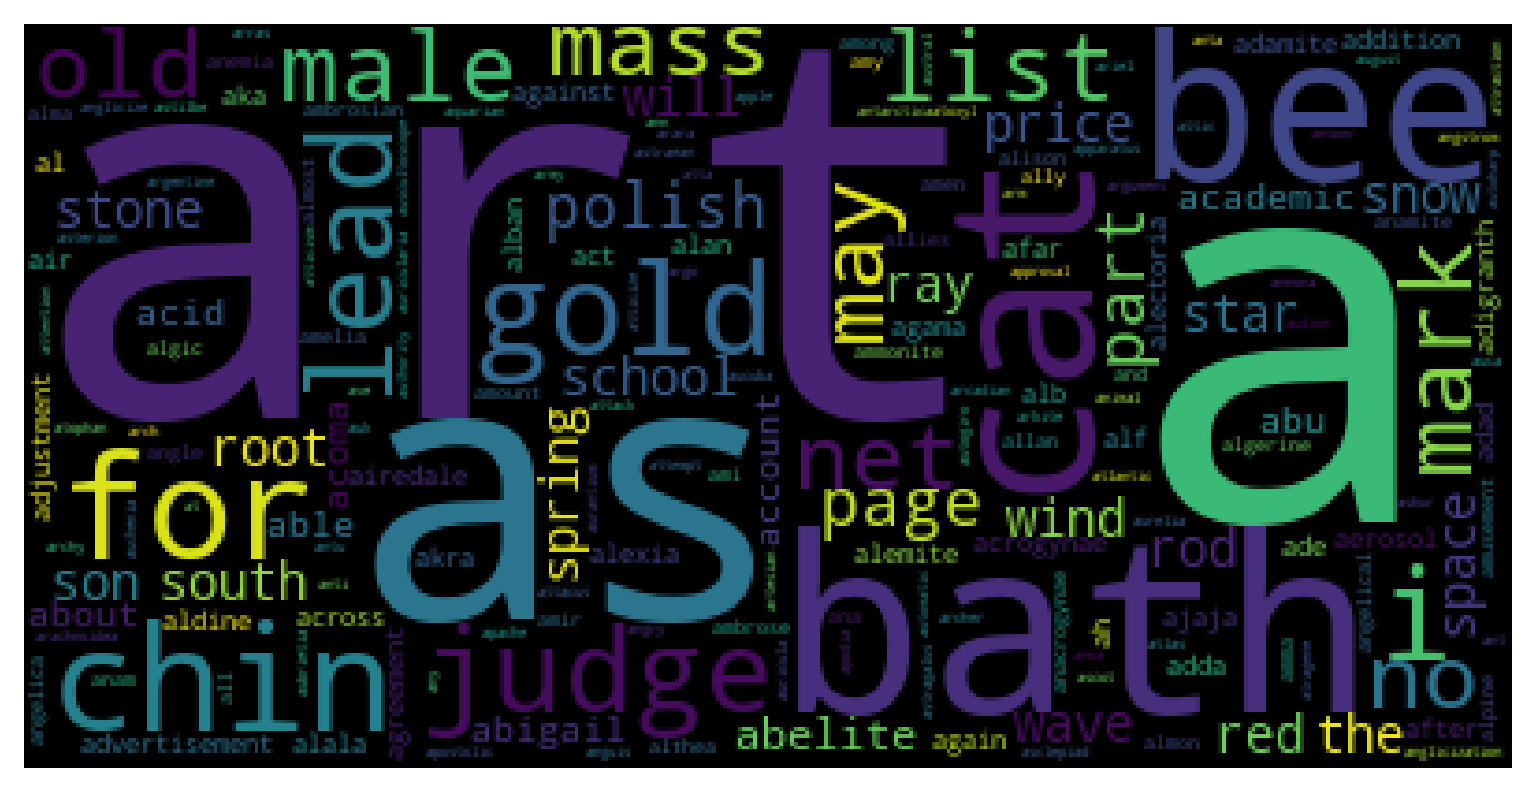

In [4]:
mycloud = WordCloud()
mycloud.generate_from_frequencies(Counter(corpus))

plt.figure(figsize=(8,6), dpi=240)
plt.imshow(mycloud)
plt.axis("off")
plt.show()

***
### 2. Limpiar el corpus: eliminar signos de puntuación, de interrogación, admiración y elementos no léxicos.
El corpus seleccionado de nltk cuenta únicamente con elementos léxicos.

In [5]:
#Importo la biblioteca re para expresiones regulares
import re

#A continuación se verifica que todos los tokens esten conformados por
#elementos alfabeticos, o con un guin en el medio;
#Esto ultimo ocurre, por ejemplo, con el token 'jean-christophe'
#para esto se utiliza la ER '[a-zA-Z]+-[a-zA-Z]+'

#variable auxiliar
palabras = True

#Recorre el corpus completo o hasta encontrar un token
#que no cumpla con las caracteristicas
for w in (swl for swl in corpus if palabras):
    #verifica si el token es aceptado por la ER
    guion_en_nombre = re.findall("[a-zA-Z]+-[a-zA-Z]+", w)
    #La variable palabras se vuelve False si el token no es alfabetico
    #y no es acepatdo por la ER
    palabras = palabras and False if (not w.isalpha() and len(guion_en_nombre) == 0) else True
    
#Se muestra el resultado obtenido segun el valor de la variable auxiliar
print("Corpus listo") if palabras else print("Hace falta limpiar el corpus: ", w)

Corpus listo


***
### 3. Eliminar las stopwords (se puede utilizar listas pre-hechas como las de nltk).

In [6]:
#Utilizo las stopwords proporcionadas por nltk
from nltk.corpus import stopwords

#Se guardan en la variable stopwords_list
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
#variable auxiliar
palabras = True

#Recorre el arreglo de stopwords completo o hasta encontrar
#una stopword en el corpus 
for w in (swl for swl in stopwords_list if palabras):
    
    #La variable palabras se vuelve False si la stopword esta en el corpus
    palabras = palabras and False if (w in corpus) else True
    
#Se muestra el resultado obtenido segun el valor de la variable auxiliar
print("Corpus listo") if palabras else print("Hace falta limpiar el corpus: ", w)

Hace falta limpiar el corpus:  i


In [8]:
#En la variable corpus_no_stopw se gurada el corpus sin stopwords
corpus_no_stopw = [w for w in corpus if w not in stopwords_list]
tokens_no_stopw = len(corpus_no_stopw)
tipos_no_stopw = len(set(corpus_no_stopw))
print("Tokens:\t",tokens_no_stopw)
print("Tipos:\t",tipos_no_stopw, end="\n\n")
print(sample(corpus_no_stopw,80))

Tokens:	 236524
Tipos:	 234243

['isomerization', 'wappenschaw', 'synecology', 'standstill', 'nonsurrender', 'erethism', 'primatic', 'antipleion', 'preglacial', 'unthickened', 'paddockstool', 'genuflect', 'virginitis', 'perjinkly', 'hemelytron', 'infusoria', 'bajree', 'roistering', 'snibbler', 'teeswater', 'epileptic', 'peltatodigitate', 'unplausibly', 'unstating', 'enterography', 'tan', 'almuredin', 'inconvincibly', 'amphogenous', 'falisci', 'antipopular', 'geoblast', 'panclastic', 'derogatorily', 'complimentative', 'guineaman', 'anemosis', 'cry', 'drupal', 'unvivacious', 'overfull', 'asclepiadaceae', 'introit', 'alcoholemia', 'mesembryonic', 'genioglossus', 'amaryllidaceae', 'witchlike', 'dolomization', 'tensimeter', 'oligochromemia', 'onyxis', 'ill', 'unformulable', 'comfortful', 'hopper', 'possibilitate', 'orchidoplasty', 'deliriously', 'bibracteate', 'answeringly', 'liespfund', 'rotary', 'advancedness', 'pothery', 'palatoplasty', 'idiosyncrasy', 'walled', 'enthymematic', 'sensilia

In [9]:
#variable auxiliar
palabras = True

#Recorre el arreglo de stopwords completo o hasta encontrar
#una stopword en el corpus nuevo
for w in (swl for swl in stopwords_list if palabras):
    
    #La variable palabras se vuelve False si la stopword esta en el nuevo corpus
    palabras = palabras and False if (w in corpus_no_stopw) else True
    
#Se muestra el resultado obtenido segun el valor de la variable auxiliar
print("Corpus listo") if palabras else print("Hace falta limpiar el corpus: ", w)

Corpus listo


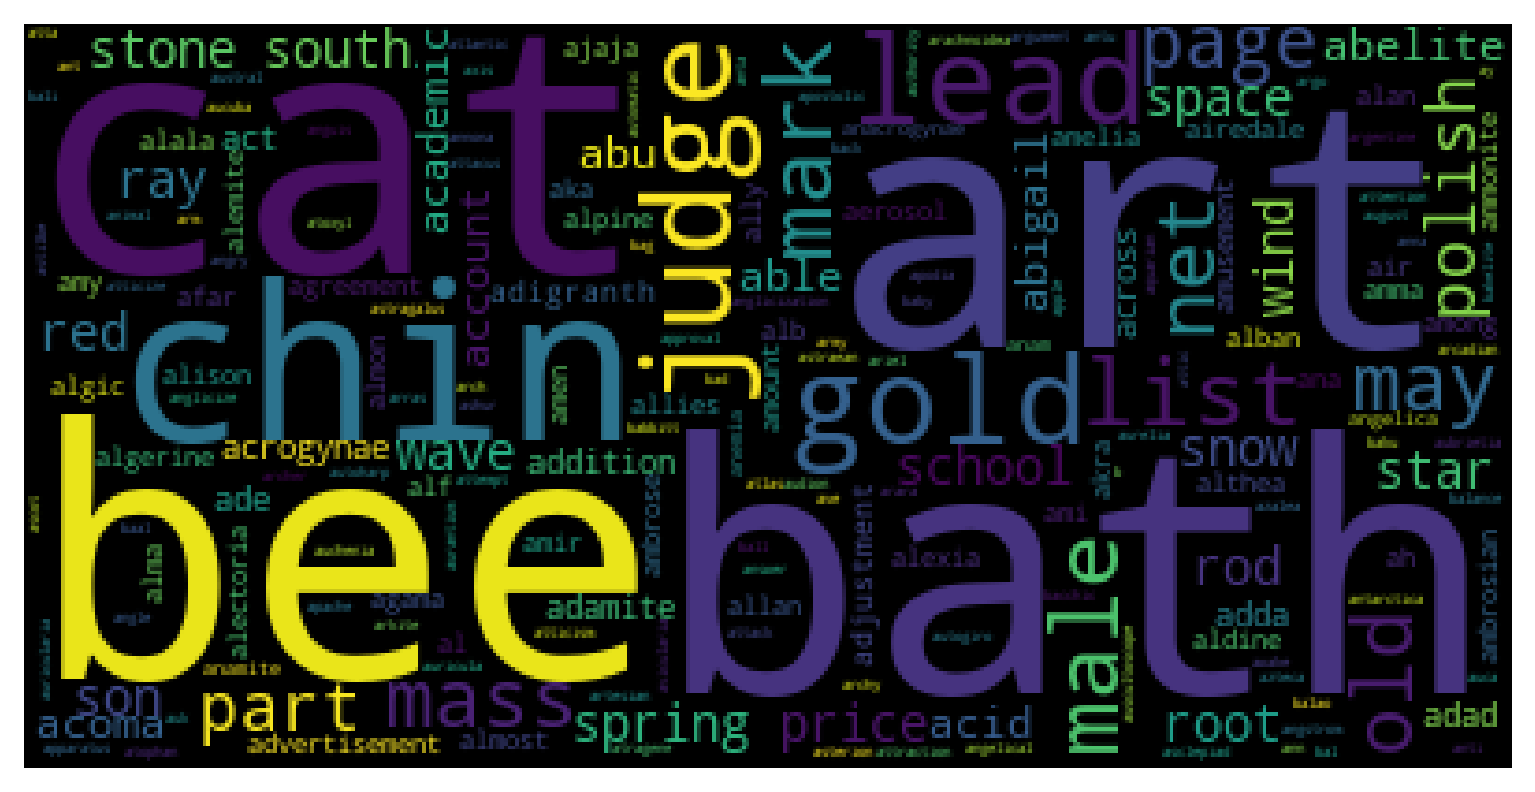

In [10]:
mycloud = WordCloud()
mycloud.generate_from_frequencies(Counter(corpus_no_stopw))

plt.figure(figsize=(8,6), dpi=240)
plt.imshow(mycloud)
plt.axis("off")
plt.show()

***
### 4. Aplicar un algoritmo de Stemming a los tokens limpios (p. ej. el algoritmo de Porter).

In [11]:
#Para llevar a cabo el stemming utilizo una herramienta proporcionada por nltk
#Importo snowball
from nltk.stem import snowball

#Se crea el stemmer
stemmer = snowball.EnglishStemmer()

#muestro algunos de los afijos
print(stemmer._EnglishStemmer__step2_suffixes, end="\n\n")
print(stemmer._EnglishStemmer__special_words)

('ization', 'ational', 'fulness', 'ousness', 'iveness', 'tional', 'biliti', 'lessli', 'entli', 'ation', 'alism', 'aliti', 'ousli', 'iviti', 'fulli', 'enci', 'anci', 'abli', 'izer', 'ator', 'alli', 'bli', 'ogi', 'li')

{'skis': 'ski', 'skies': 'sky', 'dying': 'die', 'lying': 'lie', 'tying': 'tie', 'idly': 'idl', 'gently': 'gentl', 'ugly': 'ugli', 'early': 'earli', 'only': 'onli', 'singly': 'singl', 'sky': 'sky', 'news': 'news', 'howe': 'howe', 'atlas': 'atlas', 'cosmos': 'cosmos', 'bias': 'bias', 'andes': 'andes', 'inning': 'inning', 'innings': 'inning', 'outing': 'outing', 'outings': 'outing', 'canning': 'canning', 'cannings': 'canning', 'herring': 'herring', 'herrings': 'herring', 'earring': 'earring', 'earrings': 'earring', 'proceed': 'proceed', 'proceeds': 'proceed', 'proceeded': 'proceed', 'proceeding': 'proceed', 'exceed': 'exceed', 'exceeds': 'exceed', 'exceeded': 'exceed', 'exceeding': 'exceed', 'succeed': 'succeed', 'succeeds': 'succeed', 'succeeded': 'succeed', 'succeeding': '

In [12]:
#La variable corpus_stemed almacena el corpus stemmizado
corpus_stemed = [stemmer.stem(w) for w in corpus_no_stopw]
tokens_stemed = len(corpus_stemed)
tipos_stemed = len(set(corpus_stemed))
print("Tokens:\t",tokens_stemed)
print("Tipos:\t",tipos_stemed, end="\n\n")
print(sample(corpus_stemed,80))

Tokens:	 236524
Tipos:	 174269

['monogram', 'miller', 'unadvers', 'monzonit', 'bargeman', 'caryopteri', 'educationalist', 'iliolumbar', 'surviv', 'lanat', 'chivalresqu', 'aegrot', 'keena', 'squint', 'perish', 'alkalimetr', 'clammi', 'betoni', 'benzoyl', 'aeroplanist', 'harmoniac', 'polythion', 'necrom', 'pentacrost', 'nebbi', 'hermitari', 'streaki', 'superincreas', 'divid', 'lepanto', 'incoalesc', 'actless', 'refraction', 'hectograph', 'lucrat', 'touchwood', 'interlaud', 'inwe', 'paceboard', 'monatom', 'diarthric', 'kinesalgia', 'whase', 'precompl', 'lithotom', 'nonconnubi', 'relum', 'establishmentarian', 'rhipidium', 'unwind', 'insimpl', 'liberticid', 'fleuri', 'doctor', 'prototherian', 'outskirt', 'roughhousi', 'overadvic', 'palatopterygoid', 'archhost', 'wanhorn', 'huffler', 'cucujus', 'uninterrupt', 'heterozygos', 'moocher', 'strapwork', 'exhaust', 'finless', 'colugo', 'remediless', 'dungol', 'hexastich', 'emolumentari', 'kitti', 'nephropsida', 'imparasit', 'khediv', 'fetus', 'stu

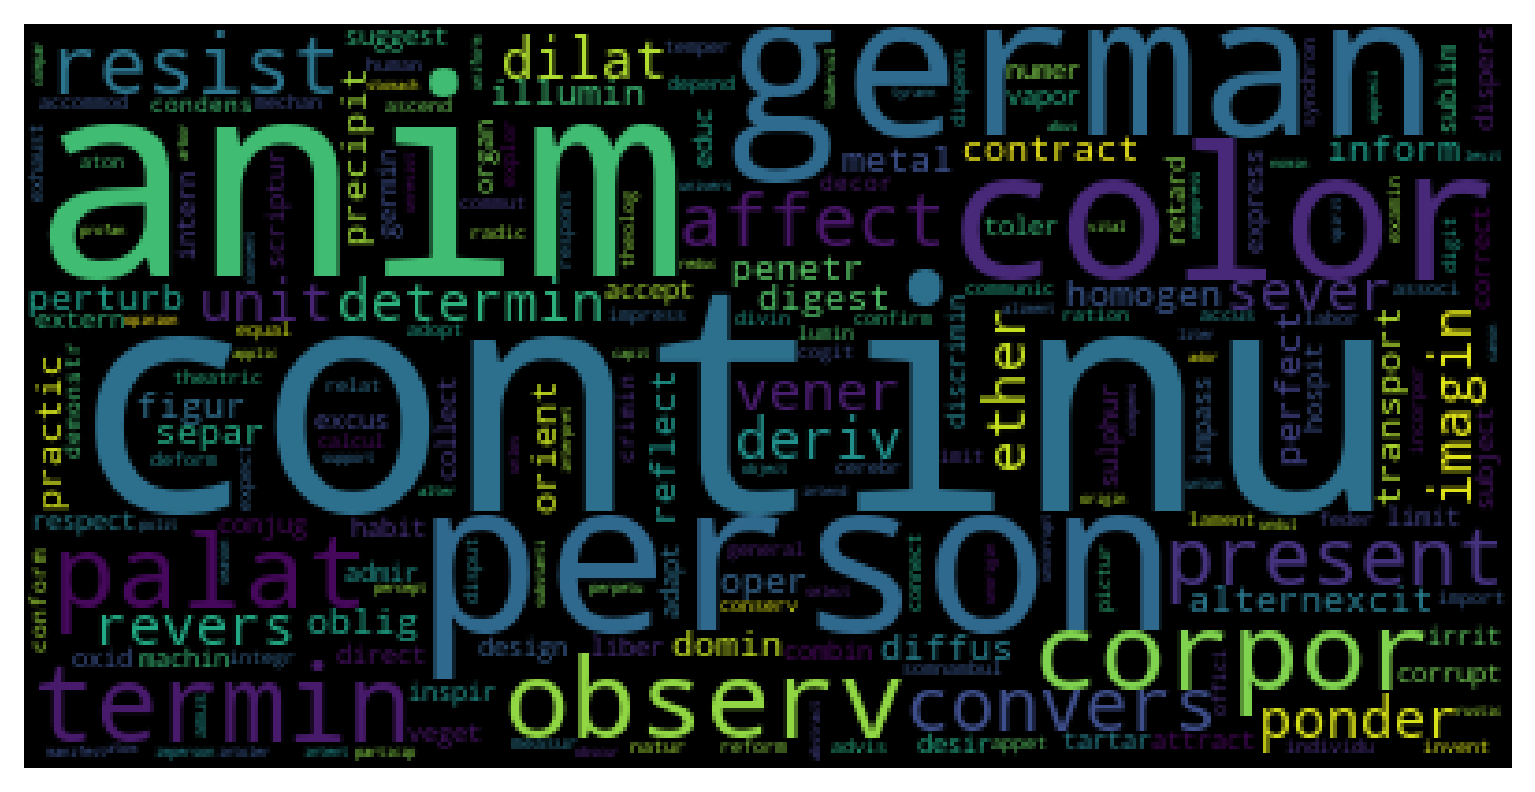

In [13]:
mycloud = WordCloud()
mycloud.generate_from_frequencies(Counter(corpus_stemed))

plt.figure(figsize=(8,6), dpi=240)
plt.imshow(mycloud)
plt.axis("off")
plt.show()

***
### 5. Obtener las frecuencias de los tipos en el corpus.

In [14]:
#Con la función Counter se obtiene un diccionario con los tipos y sus frecuencias
frec_tipos = Counter(corpus_stemed)
print("Tokens:\t",tokens_stemed)
print("Tipos:\t",tipos_stemed, end="\n\n")
print("Tipos/Tokens:\t",tipos_stemed/tokens_stemed, end="\n\n")

Tokens:	 236524
Tipos:	 174269

Tipos/Tokens:	 0.7367920380172837



***
### 6. Obtener la lista de tipos por orden de frecuencia (de mayor frecuencia a menor frecuencia).

In [15]:
#El diccionario se ordena segun el valor almacenado, es decirt su frecuencia,
#de mayor a menor
frec_tipos = {key: val for key, val in sorted(frec_tipos.items(), key = lambda ele: ele[1], reverse = True)}

#muestro los tokens con más de 14 ocurrencias
print({llave:frec_tipos[llave] for llave in frec_tipos if frec_tipos[llave]>14})

{'continu': 26, 'anim': 24, 'person': 22, 'german': 21, 'color': 20, 'corpor': 20, 'observ': 20, 'termin': 20, 'palat': 19, 'present': 19, 'resist': 19, 'affect': 18, 'convers': 18, 'determin': 18, 'dilat': 18, 'imagin': 18, 'ponder': 18, 'revers': 18, 'sever': 18, 'unit': 18, 'vener': 18, 'deriv': 17, 'ether': 17, 'homogen': 17, 'illumin': 17, 'penetr': 17, 'perturb': 17, 'practic': 17, 'precipit': 17, 'transport': 17, 'altern': 16, 'contract': 16, 'diffus': 16, 'digest': 16, 'domin': 16, 'excit': 16, 'figur': 16, 'inform': 16, 'metal': 16, 'oblig': 16, 'oper': 16, 'orient': 16, 'perfect': 16, 'reflect': 16, 'separ': 16, 'suggest': 16, 'veget': 16, 'corrupt': 15, 'design': 15, 'desir': 15, 'educ': 15, 'impass': 15, 'inspir': 15, 'machin': 15, 'organ': 15, 'respect': 15, 'sulphur': 15, 'tartar': 15}


## Fuentes de Consulta:
- https://github.com/VMijangos/Curso-Procesamiento-de-Lenguaje-Natural/blob/master/Notebooks/01%20Corpus.ipynb

- https://www.nltk.org/api/nltk.stem.html

- https://stackoverflow.com/questions/35690892/how-to-stem-shakespere-kjv-using-nltk-stem-snowball

- https://www.geeksforgeeks.org/python-sort-a-dictionary/